<a href="https://colab.research.google.com/github/ucfilho/ANN/blob/master/ANN_2022/Image_07/class_007_image_processing_cats_003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import pandas as pd
import random
import zipfile
from matplotlib import pyplot as plt
import skimage.feature
from string import digits
import seaborn as sns
import skimage
import tensorflow as tf
from sklearn.model_selection import train_test_split
from imageio import imread

In [2]:
!git clone https://github.com/ucfilho/Machine_Learning_DataSet
%cd Machine_Learning_DataSet

fatal: destination path 'Machine_Learning_DataSet' already exists and is not an empty directory.
/content/Machine_Learning_DataSet


In [3]:
# check: https://pythontutorials.eu/deep-learning/transfer-learning/#

In [4]:
FILE='cats.zip'
archive = zipfile.ZipFile(FILE, 'r')
archive.extractall()

In [5]:
archive = zipfile.ZipFile(FILE, 'r')
archive.extractall()

In [6]:
img_name=[]
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name.append(name)

In [7]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

data = np.empty((40, 224, 224, 3))

for i in range(0, 20):
    if('jpg' in img_name[i]):
      im = cv2.imread(img_name[i])
      im = cv2.resize(im, (224, 224))
      im = im/255.0 # preprocess_input(im)
      if(max(im.flatten())>1):
        im = im/max(im.flatten())
      data[i] = im

for i in range(0, 20):
    if('jpg' in img_name[i+20]):
      im = np.array(cv2.imread(img_name[i+20]))
      im = cv2.resize(im,(224, 224))
      im = im/255.0 #preprocess_input(im)
      if(max(im.flatten())>1):
        im = im/max(im.flatten())
      data[i + 20] = im

labels = np.empty(40, dtype=int)
labels[:20] = 0
labels[20:] = 1

In [8]:
data.shape

(40, 224, 224, 3)

In [9]:
from keras.applications.mobilenet_v2 import MobileNetV2

#model = MobileNetV2(weights='imagenet')

In [10]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

In [11]:
# The first 15 images for male and female cats will be used for training
training_data = np.empty((30, 224, 224, 3))
training_data[:15] = data[:15]
training_data[15:] = data[20:35]
training_labels = np.empty(30)
training_labels[:15] = 0
training_labels[15:] = 1
# The last 5 images for male and female cats will be used for validation
validation_data = np.empty((10, 224, 224, 3))
validation_data[:5] = data[15:20]
validation_data[5:] = data[35:]
validation_labels = np.empty(10)
validation_labels[:5] = 0
validation_labels[5:] = 1

In [12]:
training_labels.shape

(30,)

In [ ]:
# check: https://learnopencv.com/keras-tutorial-fine-tuning-using-pre-trained-models/

In [13]:
from tensorflow.keras.applications import vgg16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,  Flatten, Dropout
# Init the VGG model 
vgg_conv = vgg16.VGG16(weights='imagenet') #, include_top=False, input_shape=(Img_Size, Img_Size, 3))

# Freeze all the layers
for layer in vgg_conv.layers[:]:
    layer.trainable = False

# Create the model
model = Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(Flatten())
model.add(Dense(1028, activation='sigmoid')) #relu
model.add(Dropout(0.2))
model.add(Dense(1, activation= 'sigmoid'))#'relu'))

In [14]:

model.compile(optimizer='adam',
              loss='binary_crossentropy', #tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [15]:
r = model.fit(
    x=training_data,
    y=training_labels,
    validation_data=(validation_data, validation_labels),
    epochs=30,
    verbose=2
)

Epoch 1/30
1/1 - 18s - loss: 0.8292 - accuracy: 0.5000 - val_loss: 0.7208 - val_accuracy: 0.5000 - 18s/epoch - 18s/step
Epoch 2/30
1/1 - 14s - loss: 0.7395 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5000 - 14s/epoch - 14s/step
Epoch 3/30
1/1 - 14s - loss: 0.7139 - accuracy: 0.4667 - val_loss: 0.7115 - val_accuracy: 0.5000 - 14s/epoch - 14s/step
Epoch 4/30
1/1 - 14s - loss: 0.6751 - accuracy: 0.5667 - val_loss: 0.7308 - val_accuracy: 0.5000 - 14s/epoch - 14s/step
Epoch 5/30
1/1 - 14s - loss: 0.7439 - accuracy: 0.4667 - val_loss: 0.7351 - val_accuracy: 0.5000 - 14s/epoch - 14s/step
Epoch 6/30
1/1 - 15s - loss: 0.7926 - accuracy: 0.4333 - val_loss: 0.7247 - val_accuracy: 0.5000 - 15s/epoch - 15s/step
Epoch 7/30
1/1 - 14s - loss: 0.7889 - accuracy: 0.5333 - val_loss: 0.7083 - val_accuracy: 0.5000 - 14s/epoch - 14s/step
Epoch 8/30
1/1 - 14s - loss: 0.7661 - accuracy: 0.4667 - val_loss: 0.6955 - val_accuracy: 0.5000 - 14s/epoch - 14s/step
Epoch 9/30
1/1 - 14s - loss: 0.6808 - ac

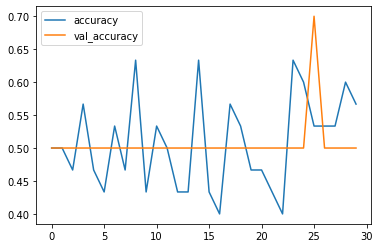

In [16]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

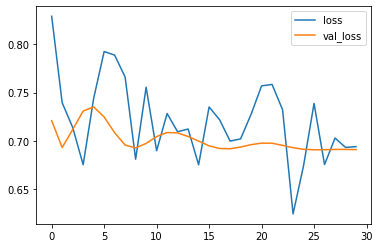

In [17]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()